# Contents 
In this session we will cover the follwing:
1. NetworkX Overview
2. Adding Attributes to Nodes and Edges
3. The DiGraph Class - The Directed Graph
4. Community Detection 
5. Your Turn

## 1. NetworkX Overview

### Creating a Network

In [1]:
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline 

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


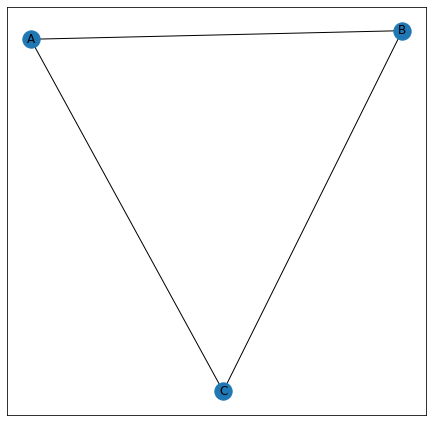

In [2]:
G = nx.Graph()

G.add_node('A')
G.add_nodes_from(['B', 'C'])

G.add_edge('A', 'B')
G.add_edges_from([('B', 'C'), ('A', 'C')])

plt.figure(figsize=(7.5, 7.5))
nx.draw_networkx(G)

figure( ) is used to create a 7.5 by 7.5 inch figure to hold the visualization. 

In [3]:
# Configure plotting in Jupyter
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
import random
from numpy import random as nprand
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)
random.seed(seed)

- Instead of configuring the figure size every time we want to display a figure we can edit the default by the command: plt.rcParams.update
- Visualization may look slightly different every time you run the code. This is because visualizations in NetworkX sometimes use randomized algorithms. The randomized algorithms can be configured to produce the same output each time by setting the random seed.  

### Add several nodes and edges at the same time

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


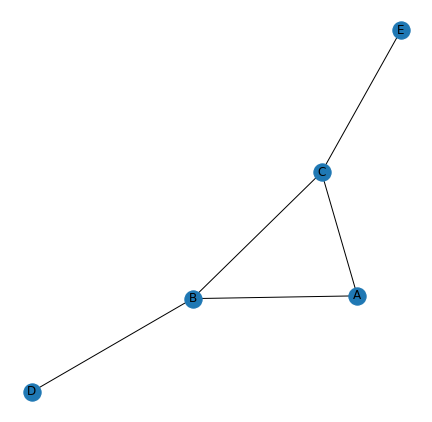

In [4]:
G.add_edges_from([('B', 'D'), ('C', 'E')])
nx.draw_networkx(G)

### Undirected networks

- The code below stores the karate club network in G. 
- The visualization layout is then pre-calculated using spring_layout() and stored in karate_pos.  
- This will allow us to reuse the layout throughout the notebook. 
- Spring_layout() tries to place nodes closer together if they are connected by an edge
- There are many different layout methods, such as: spiral, shell and random, see the documentation for more details.
https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html
- Next, the call to draw_networkx() creates the following visualization:

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


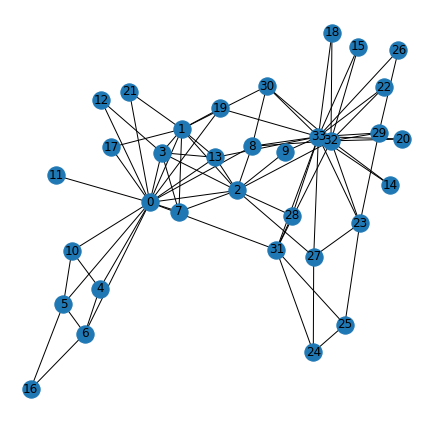

In [5]:
G = nx.karate_club_graph()
karate_pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, karate_pos)

In [6]:
list(G.nodes)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [7]:
list(G.edges)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 2),
 (1, 3),
 (1, 7),
 (1, 13),
 (1, 17),
 (1, 19),
 (1, 21),
 (1, 30),
 (2, 3),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 13),
 (2, 27),
 (2, 28),
 (2, 32),
 (3, 7),
 (3, 12),
 (3, 13),
 (4, 6),
 (4, 10),
 (5, 6),
 (5, 10),
 (5, 16),
 (6, 16),
 (8, 30),
 (8, 32),
 (8, 33),
 (9, 33),
 (13, 33),
 (14, 32),
 (14, 33),
 (15, 32),
 (15, 33),
 (18, 32),
 (18, 33),
 (19, 33),
 (20, 32),
 (20, 33),
 (22, 32),
 (22, 33),
 (23, 25),
 (23, 27),
 (23, 29),
 (23, 32),
 (23, 33),
 (24, 25),
 (24, 27),
 (24, 31),
 (25, 31),
 (26, 29),
 (26, 33),
 (27, 33),
 (28, 31),
 (28, 33),
 (29, 32),
 (29, 33),
 (30, 32),
 (30, 33),
 (31, 32),
 (31, 33),
 (32, 33)]

### Checking for nodes

In [8]:
mr_hi = 0
mr_hi in G

True

In [9]:
G.has_node(mr_hi)

True

In [10]:
wild_goose = 1337
wild_goose in G

False

In [11]:
G.has_node(wild_goose)

False

### Finding node neighbors

In [12]:
list(G.neighbors(mr_hi))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

In [13]:
member_id = 1
(mr_hi, member_id) in G.edges

True

In [14]:
G.has_edge(mr_hi, member_id)

True

In [15]:
G.has_edge(33,0)

False

In [16]:
john_a = 33
(mr_hi, john_a) in G.edges

False

In [17]:
G.has_edge(mr_hi, john_a)

False

## Part 2:  Adding attributes to nodes and edges

In [18]:
member_club = [
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1]

In [19]:
for node_id in G.nodes:
    G.nodes[node_id]["club"] = member_club[node_id]

In [20]:
G.add_node(11, club=0)

In [21]:
G.nodes[mr_hi]

{'club': 0}

In [22]:
G.nodes[john_a]

{'club': 1}

In [23]:
node_color = [
    '#1f78b4' if G.nodes[v]["club"] == 0
    else '#33a02c' for v in G]

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


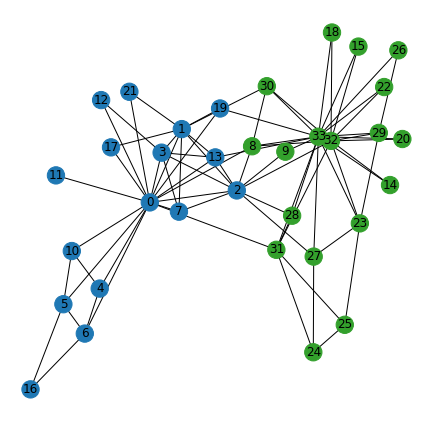

In [24]:
nx.draw_networkx(G, karate_pos, label=True, node_color=node_color)

### Adding Edge Weights

In [25]:
def tie_strength(G, v, w):
    # Get neighbors of nodes v and w in G
    v_neighbors = set(G.neighbors(v))
    w_neighbors = set(G.neighbors(w))
    # Return size of the set intersection
    return 1 + len(v_neighbors & w_neighbors)

In [26]:
# Calculate weight for each edge
for v, w in G.edges: 
    G.edges[v, w]["weight"] = tie_strength(G, v, w)
# Store weights in a list
edge_weights = [G.edges[v, w]["weight"] for v, w in G.edges] 

In [27]:
weighted_pos = nx.spring_layout(G, pos=karate_pos, k=0.3, weight="weight")

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


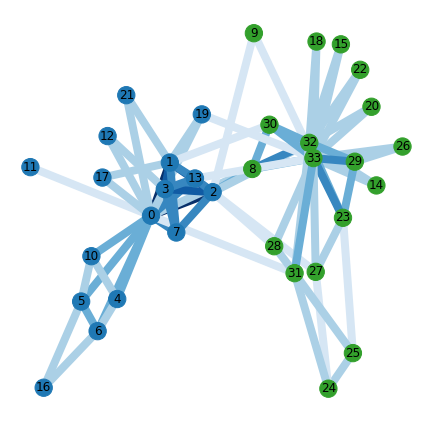

In [28]:
# Draw network with edge color determined by weight
nx.draw_networkx(
    G, weighted_pos, width=8, node_color=node_color,
    edge_color=edge_weights, edge_vmin=0, edge_vmax=6, edge_cmap=plt.cm.Blues)


## Part 3: The DiGraph Class - The Directed Graph

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


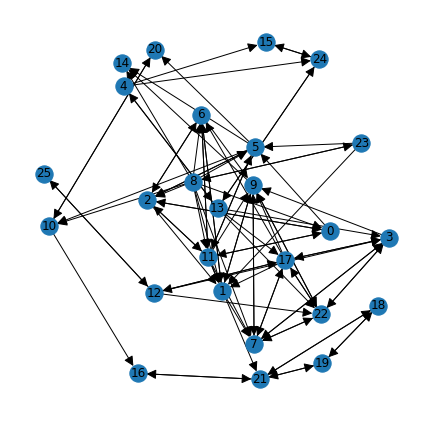

In [29]:
G = nx.read_gexf("data/knecht2008/klas12b-net-1.gexf", node_type=int)
student_pos = nx.spring_layout(G, k=1.5)
nx.draw_networkx(G, student_pos, arrowsize=20)

In [30]:
list(G.neighbors(0))

[2, 5, 11]

In [31]:
list(G.successors(0))

[2, 5, 11]

In [32]:
list(G.predecessors(0))

[2, 11, 8]

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


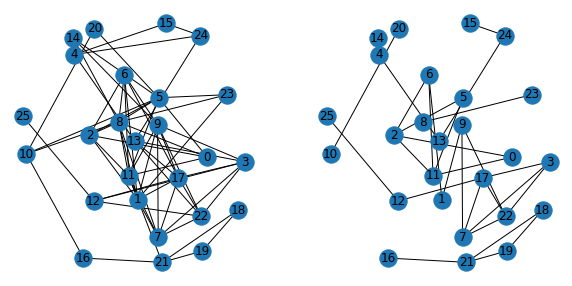

In [33]:
# Create undirected copies of G
G_either = G.to_undirected()
G_both = G.to_undirected(reciprocal=True)

# Set up a figure
plt.figure(figsize=(10,5))

# Draw G_either on left
plt.subplot(1, 2, 1)
nx.draw_networkx(G_either, student_pos)

# Draw G_both on right
plt.subplot(1, 2, 2)
nx.draw_networkx(G_both, student_pos)

## Part 4: Community Detection

### Givan Newman Algorithm

In [34]:
from networkx.algorithms.community.centrality import girvan_newman

In [35]:
G = nx.karate_club_graph()
communities = girvan_newman(G)

In [36]:
node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


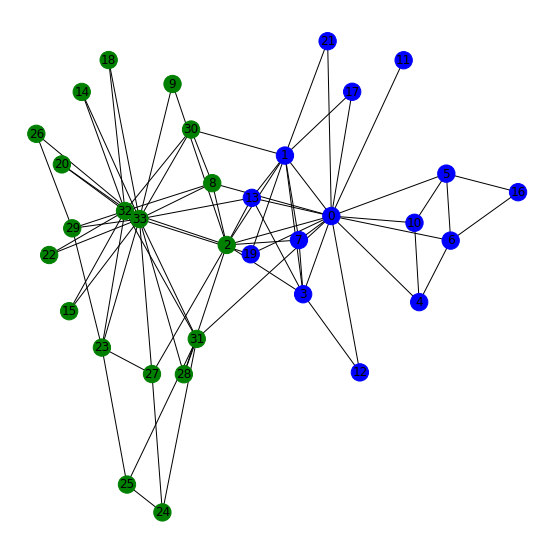

In [37]:
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

### Louvain Algorithm 

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


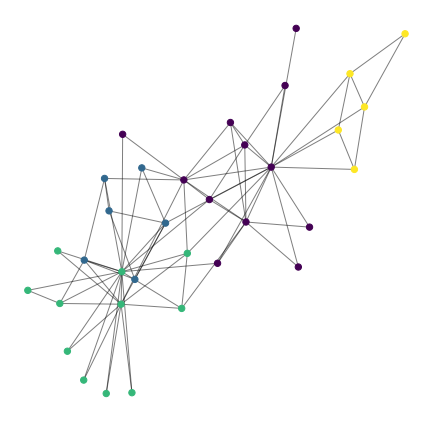

In [38]:
import community as community_louvain
import matplotlib.cm as cm

# compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)

# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

### Summary points
1. When creating a network from data, the most important questions to ask is what exactly the nodes and edges should represent.
2. There are many possibilities for the same dataset.
3. Some possibilities: 
    - Social relationships, such as friendships, romantic relationships, or even rivalries
    - Flows, such as information, people, money, fluids, or energy
    - Influence, such as scientific citations, software dependencies, or protein interactions
    - Connection, such as between networked computers, bones in a skeleton, neighboring countries, or railway lines
    - Interaction, such as predator-prey relationships or international treaties
    - Co-occurrence of words in text

***

## Part 5: Your Turn
Complete the code below as directed and submit it to the Blackboard page of the course.

Here is the content of a sample edge list network, representing a fictional subway system:
You can view the data file, example.edgelist in data folder
#Example edge list network

#source target 

Winegroom Uptown <br>
Winegroom Strawshop <br>
Uptown Strawshop <br>
Uptown Amazelake <br>
Strawshop Province <br>

Before reading the network file, we store the directory containing the data in data_dir:

In [39]:
from pathlib import Path
data_dir = Path('.') / 'data'

Next, the read_edgelist( ) function creates a Graph class from the edge list file, like so:

In [40]:
G = nx.read_edgelist(data_dir/'example.edgelist')

### Question 1: Visulaize this network as we did before, refer to the section [Undirected networks](#Undirected-networks)

In [41]:
# Write your code here


### Question 2: Check whether the node "Province" is in the graph.

### Question 3: Check whether the node "Oakwood" is in the graph.

### Question 4: list all the nodes in the graph, and all the edges.

### Question 5: add the stations "Mall" and "MainStreet" in 1 step to the gaph and connect them to "uptown".

### Question 6: Find the neighbors of node "Uptown".

What we did so far, NetworkX assumed the edge list represents an undirected network and returned a Graph class accordingly. If a network is directed, the read_edgelist() function can also return a DiGraph class. The only necessary change is that the DiGraph class must be passed as the create_using parameter. For directed networks, the first node on each line of the edge list will be interpreted as the source and the second as the target. 

In [42]:
# Read edge list

G = nx.read_edgelist(data_dir/'example.edgelist', create_using=nx.DiGraph)

### Question 7: Draw the directed graph we've just created.

### Question 8: Community Detection

Now we want to use the community detection algorithm explained above with a larger dataset. The following example uses a social network constructed from combining the online social networks of 10 individuals (McAuley & Leskovec, 2012). The following code loads and visualizes the network:

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


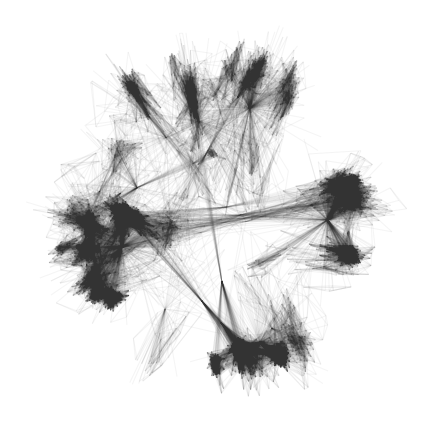

In [43]:
# Load data file into network

G_social = nx.read_edgelist (data_dir / 'mcauley2012' / 'facebook_combined.txt')

# Calculate layout and draw

pos = nx.spring_layout(G_social, k=0.1)
nx.draw_networkx(
    G_social, pos=pos, node_size=0,
    edge_color="#333333", alpha=0.05, with_labels=False)

Your turn: Now applay community detection to G_social using Louvain algorithm as we did above.

In [44]:
# compute the best partition
...